# Tutorial 4: a toy polygon shader to render in Schwarzschild spacetimes

In [16]:
import curvedpy as cp
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge
from PIL import Image
cp.__version__

'0.0.4a1'

In this tutorial we use a toy vertex shader to render a cube in a Schwarzschild spacetime.

## Setting up
First we need to set up the camera and its properties. And we need to make a cube with vertices and edges to render.

In [17]:
cam_loc = np.array([0,0,10.])
look_at = np.array([0.0,0.0,-1.0])
up = np.array([0,1,0])

left_nuv = -20
right_nuv = 20
bottom_nuv = -20
top_nuv = 20
near_nuv = 1
far_nuv = 50.0

def make_cube(cube_loc = np.array([-5, -5, -6])):
    size= 10
    cube_loc_center = np.array([cube_loc[0]+1/2*size, cube_loc[1]+1/2*size, cube_loc[2]-1/2*size, 1])
    left, down, front = cube_loc # left down front
    verts = \
    [np.array([left, down, front, 1]), \
     np.array([left, down+size, front, 1]), \
     np.array([left+size, down+size, front, 1]), \
     np.array([left+size, down, front, 1]), \
     np.array([left, down, front-size, 1]), \
     np.array([left, down+size, front-size, 1]), \
     np.array([left+size, down+size, front-size, 1]), \
     np.array([left+size, down, front-size, 1])]
    
    edges = [[0, 1], [1,2], [2,3], [3,0]]
    edges += [[4,5], [5,6], [6,7],[7,4]]
    edges += [[0, 4], [1,5], [2, 6], [3,7]]

    return np.array(verts), np.array(edges)

verts, edges = make_cube(cube_loc = np.array([-20, -5, -30]))#cube_loc = np.array([50, -5, -50]))

The setup is roughly, from a top view, like this. The vertices are in green, the center of the black hole in black and the camera points down and is shown as a blue triangle.

Text(0.5, 1.0, 'Top view')

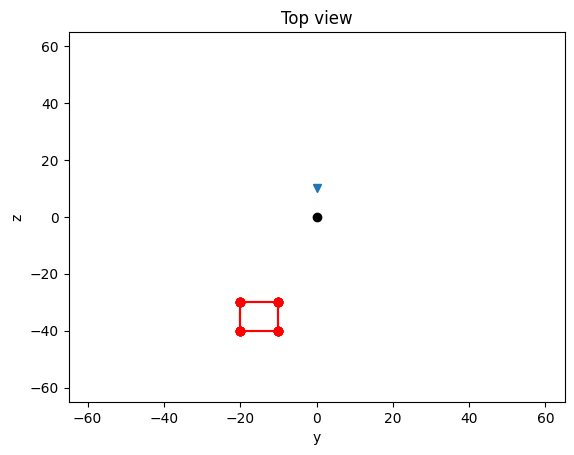

In [18]:
plt.plot(cam_loc[0], cam_loc[2], "v")

# for a in range(len(verts)):
for i,e in enumerate(edges):
    x = [verts[e[0]][0], verts[e[1]][0]]
    y = [verts[e[0]][2], verts[e[1]][2]]
    plt.plot(x, y, "ro-")


# for v in verts:
#     plt.plot(v[0], v[2], "go")
plt.plot(0,0, "ko")
l = 65

plt.xlim(-l, l)
plt.ylim(-l, l)
plt.xlabel("y")
plt.ylabel("z")
plt.title("Top view")

## Making a shader object
We need to make a CurvedVertexShader class with the camera properties given.

In [19]:
sh = cp.CurvedVertexShader(cam_loc, look_at, up, left_nuv, right_nuv, \
                    bottom_nuv, top_nuv, near_nuv, far_nuv)

## Rendering without a black hole
Lets first see how the cube looks without a black hole. So first run the render pipeline without using a black hole:

In [20]:
verts2_noBH = [sh.run(verts, image_nr = 1, use_bh=False)]

And then we plot the clipping coordinates:

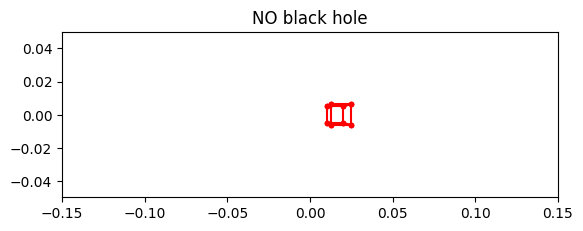

In [21]:
colors = ['r', 'b', 'g']
alphas = [1, 0.2, 0.05]

for a in range(len(verts2_noBH)):
    for i,e in enumerate(edges):
        x = [verts2_noBH[a][e[0]][0], verts2_noBH[a][e[1]][0]]
        y = [verts2_noBH[a][e[0]][1], verts2_noBH[a][e[1]][1]]
        plt.plot(x, y, ".-", zorder=1, alpha = alphas[a], color=colors[a])


ax = plt.gca()
# circle = Wedge((0, 0), 3, theta1=0, theta2=360, facecolor='k', edgecolor='k')
# circle = Wedge((0, 0), 0.0265, theta1=0.0, theta2=360, facecolor='k', edgecolor='k', zorder=2)
# ax.add_artist(circle)

ax.set_aspect('equal')
l = 0.15
plt.xlim(-l, l)
l = 0.05
plt.ylim(-l, l)
plt.title("NO black hole")
plt.savefig("tutorial_4_images/no_bh_render.png")

## Render with a black hole

Next we need to run the shader for ther vertices. We need to do this for the different image orders.

In [22]:
verts2 = [sh.run(verts, image_nr = 1, use_bh=True), \
          sh.run(verts, image_nr = 2, use_bh=True), \
          sh.run(verts, image_nr = 3, use_bh=True)]

Now we have the verts2 coordinates, which are in the clipping space. Thus we can plot the first and second element of the vertices sort of as pixels in matplotlib.

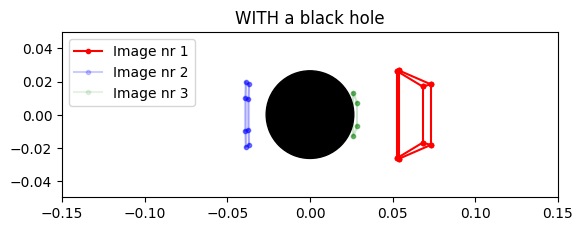

In [23]:
colors = ['r', 'b', 'g']
alphas = [1, 0.2, 0.1]

for a in range(len(verts2)):
    for i,e in enumerate(edges):
        x = [verts2[a][e[0]][0], verts2[a][e[1]][0]]
        y = [verts2[a][e[0]][1], verts2[a][e[1]][1]]
        if i == 0:
            plt.plot(x, y, ".-", zorder=1, alpha = alphas[a], color=colors[a], label=f"Image nr {a+1}")
        else:
            plt.plot(x, y, ".-", zorder=1, alpha = alphas[a], color=colors[a])

ax = plt.gca()
# circle = Wedge((0, 0), 3, theta1=0, theta2=360, facecolor='k', edgecolor='k')
circle = Wedge((0, 0), 0.0265, theta1=0.0, theta2=360, facecolor='k', edgecolor='k', zorder=2)
ax.add_artist(circle)

ax.set_aspect('equal')
l = 0.15
plt.xlim(-l, l)
l = 0.05
plt.ylim(-l, l)
plt.title("WITH a black hole")
plt.legend()
plt.savefig("tutorial_4_images/with_bh_render.png")


And if you would move the square to the other side of the black hole, it would look like this :)

![alt text](tutorial_4_images/cube_behind_bh.gif "Title")
